# Dow Jones Industrial Average (^DJI)

Source
- https://query1.finance.yahoo.com/v7/finance/download/%5EDJI?period1=475804800&period2=1600128000&interval=1d&events=history

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dow-Jones-Industrial-Average-(^DJI)" data-toc-modified-id="Dow-Jones-Industrial-Average-(^DJI)-1">Dow Jones Industrial Average (^DJI)</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2">Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Describe-Data" data-toc-modified-id="Describe-Data-3.1">Describe Data</a></span></li><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.2">Sample the data</a></span></li><li><span><a href="#Number-the-columns" data-toc-modified-id="Number-the-columns-3.3">Number the columns</a></span></li></ul></li><li><span><a href="#Format-Dates" data-toc-modified-id="Format-Dates-4">Format Dates</a></span></li><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-5">Draw Plots</a></span></li></ul></div>

# Set Up

In [46]:
date_format = "yyyy_mm_dd" # 2007.04.05
show_help = false
include("MarketIndicators.jl") 

# Read Data

In [43]:
#data = available_datasets()
dataset_file_name = available_datasets()[14,2] # row 5, column 5 = ^DJI.csv
df = fetch_dataset(dataset_file_name, date_format)

size(df)


        usage:
              # returns a DataFrame with all available data sets (name, file_path)
              df = available_datasets() 
    

        usage: 
              # 5th dataset: DJIA, 
              # 2nd column: file-name
              dataset_file_name = available_datasets()[5,2] 
    

        usage: 
              df = fetch_dataset(
                                 dataset_file_name, 
                                 date_format="u/dd/yy", # format the saved dates are in
                                 dir="/mnt/data/indicators/original/" ) # location of your data directory
    
usage: 
                    dates = compact_dates( df[1] )
            
usage: 
                   dates = condense_dates( df[1] ) # ::Array{String,1}
                   dates = condense_dates( df[1], "mm/dd/yyy" ) # ::Array{String,1}
        
usage: 
                   file_path = save_dataset(
                                df::DataFrame,
                                file_name="my_file_

(254, 7)

## Describe Data

In [25]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,2019-09-17,,2020-09-17,254,,String
2,Open,50.2519,37.11,49.17,65.53,,,Float64
3,High,50.2519,37.11,49.17,65.53,,,Float64
4,Low,50.2519,37.11,49.17,65.53,,,Float64
5,Close,50.2519,37.11,49.17,65.53,,,Float64
6,Adj Close,50.1811,37.11,49.17,65.53,,,Float64
7,Volume,0.0,0,0.0,0,,,Int64


## Sample the data

In [31]:
show(df[end-50:end-45, # row to row
        [1,2,3,4,5,6,7]] # column to column
    , allcols=true) # do NOT limit number of columns if more than 6

6×7 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Adj Close │
│     │ String     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64   │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 2020-07-08 │ 57.09   │ 57.09   │ 57.09   │ 57.09   │ 57.09     │
│ 2   │ 2020-07-09 │ 57.32   │ 57.32   │ 57.32   │ 57.32   │ 57.32     │
│ 3   │ 2020-07-10 │ 57.51   │ 57.51   │ 57.51   │ 57.51   │ 57.51     │
│ 4   │ 2020-07-13 │ 56.11   │ 56.11   │ 56.11   │ 56.11   │ 56.11     │
│ 5   │ 2020-07-14 │ 56.56   │ 56.56   │ 56.56   │ 56.56   │ 56.56     │
│ 6   │ 2020-07-15 │ 56.81   │ 56.81   │ 56.81   │ 56.81   │ 56.81     │

│ Row │ Volume │
│     │ Int64  │
├─────┼────────┤
│ 1   │ 0      │
│ 2   │ 0      │
│ 3   │ 0      │
│ 4   │ 0      │
│ 5   │ 0      │
│ 6   │ 0      │

## Number the columns

In [27]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume


# Format Dates

In [47]:
date_format="yy/mdd"
dates = format_dates(df[:,1], date_format) # default is "yy/mdd"
dates[1:5]

5-element Array{String,1}:
 "19/917"
 "19/918"
 "19/919"
 "19/920"
 "19/923"

# Draw Plots

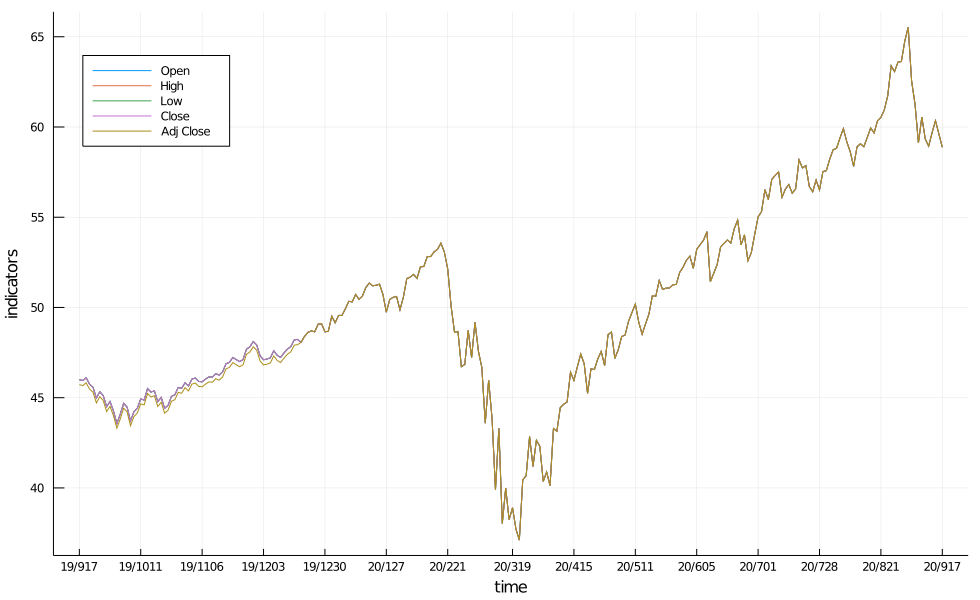

In [48]:
using Plots

rows = 1:size(df)[1]
gr()
plot(          dates, # x-axis: dates
               [ df[rows,2] df[rows,3] df[rows,4] df[rows,5] df[rows,6]   ], # y-axis
    label    = [ columns[2] columns[3] columns[4] columns[5] columns[6]]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 600), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )